In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [3]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
len(df[df['Year'].isnull() | df['Publisher'].isnull()])/ len(df) * 100

1.8496204361971322

In [5]:
# Missing values contain 1 persent that way i am removing.
df.dropna(inplace=True)

In [15]:
x = df['Name'].unique() #using numpy.ndarray to find all Names but only UNIQUE.
y = df['Genre'].unique()
z = df['Publisher'].unique()

print('Total Games by `Name` count(unique) :',len(x))
print('Total Games by `Genre` count(unique) :',len(y))
print('Total Games by `Publisher` count(unique) :',len(z))

Total Games by `Name` count(unique) : 11325
Total Games by `Genre` count(unique) : 12
Total Games by `Publisher` count(unique) : 576


In [13]:
df['Platform'].value_counts().to_dict().keys()

dict_keys(['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600', 'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX'])

In [17]:
df['Genre'].value_counts().to_dict().keys()

dict_keys(['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle'])

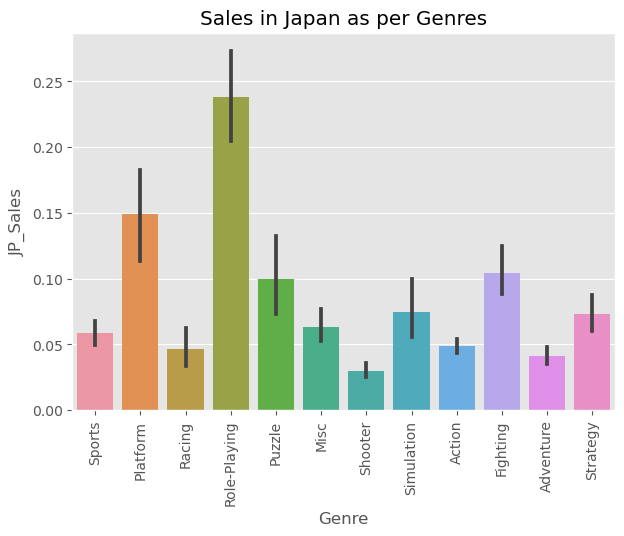

In [30]:
# function to plot graphs 
def genre_plots(title, sales):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.barplot(x = 'Genre', 
              y = sales,
              data = df, )
genre_plots('Sales in Japan as per Genres', 'JP_Sales')

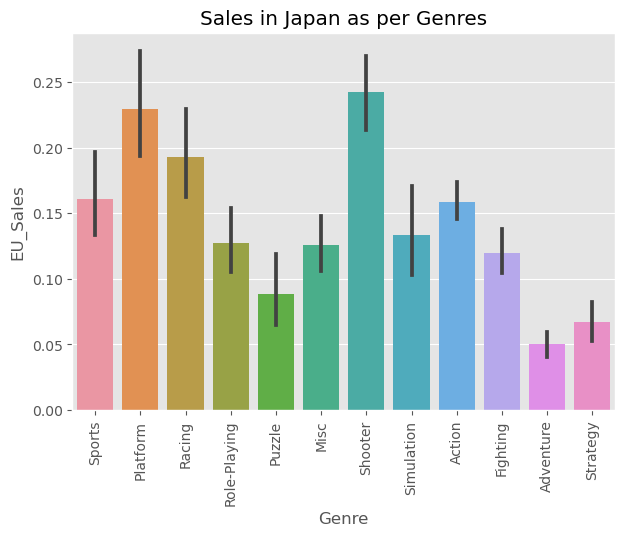

In [31]:
genre_plots('Sales in Japan as per Genres', 'EU_Sales')

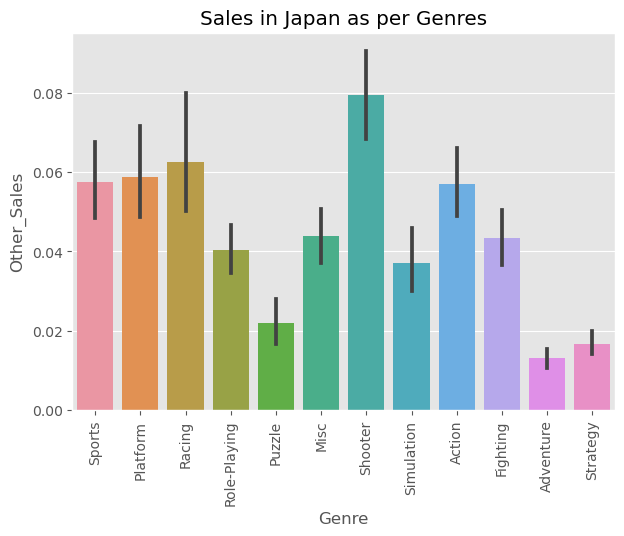

In [35]:
genre_plots('Sales in Japan as per Genres', 'Other_Sales')

C:\Users\Danjin master\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


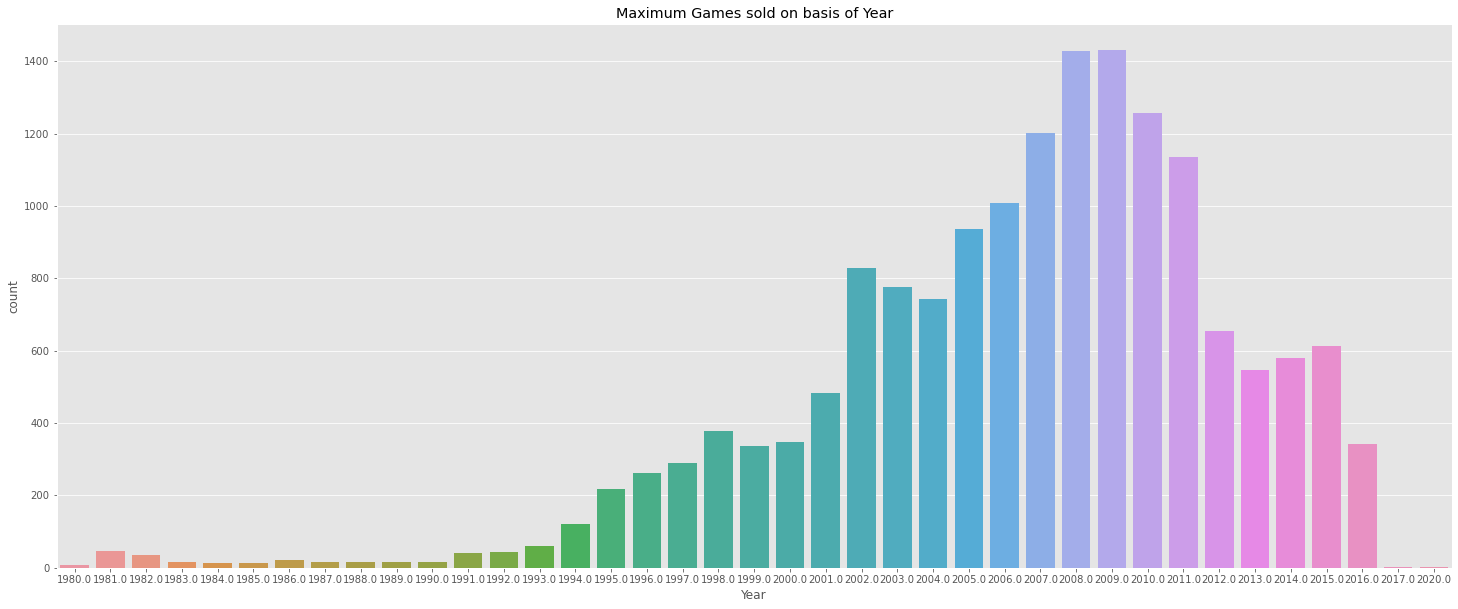

In [36]:
plt.figure(figsize=(25,10))
sns.countplot('Year',data =df)
plt.title('Maximum Games sold on basis of Year')
plt.show()

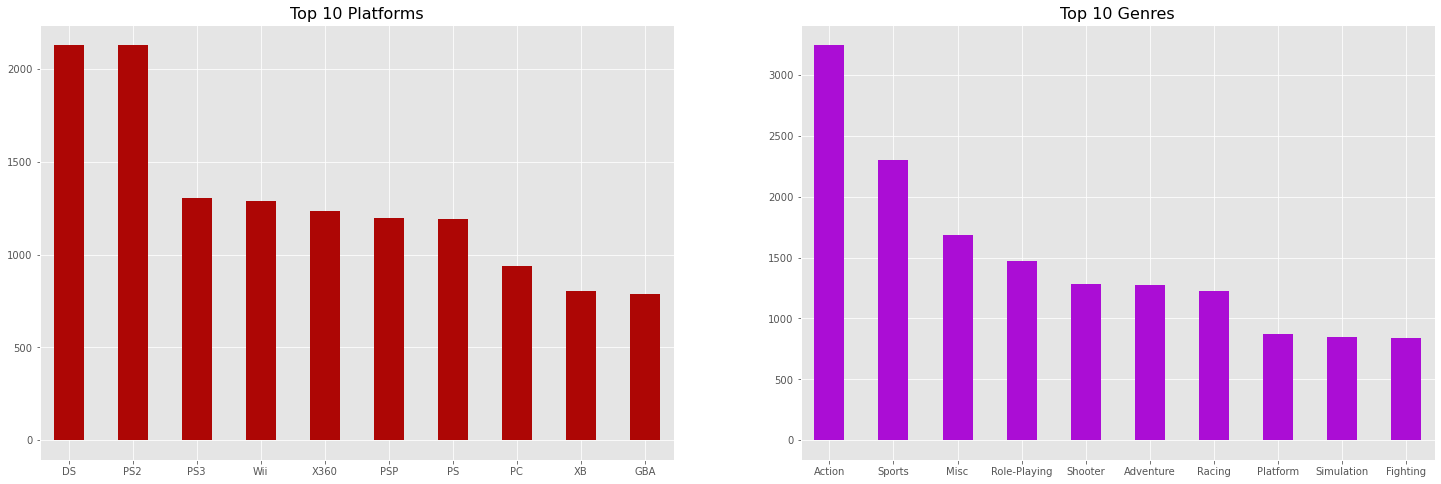

Text(0.5, 1.0, 'Top 10 Publishers')

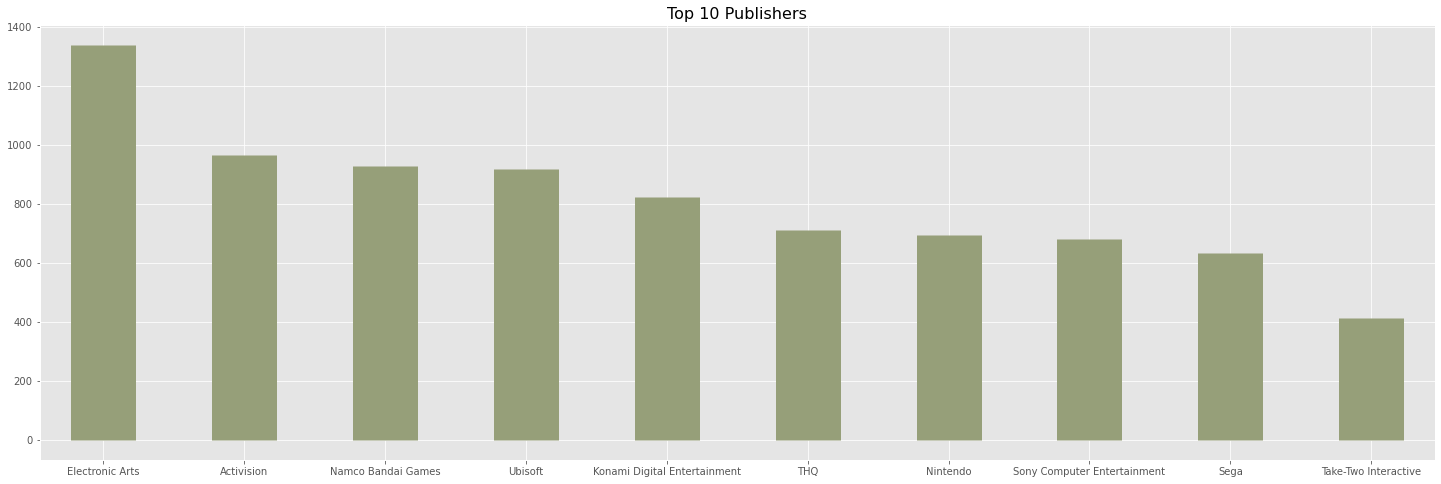

In [39]:
#top platforms (name of the platform,total number of games developed for that platform)
topPlatforms_index = df.Platform.value_counts().head(10).index
topPlatforms_values = df.Platform.value_counts().head(10).values

#top genres (name of the genre,total number of games developed in that genre)
topGenres_index = df.Genre.value_counts().head(10).index
topGenres_values = df.Genre.value_counts().head(10).values

#top game developers/publishers (name of the publisher,total number of games published by that publisher)
topPublisher_index = df.Publisher.value_counts().head(10).index
topPublisher_values = df.Publisher.value_counts().head(10).values

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,8), facecolor='white')

##top platforms used for games
ax1.vlines(x=topPlatforms_index, ymin=0, ymax=topPlatforms_values, color='#AD0605', linewidth=30)
ax1.set_title('Top 10 Platforms',fontsize=16)

#top genres of Games accordingly
ax2.vlines(x=topGenres_index, ymin=0, ymax=topGenres_values, color='#AB0DD5', linewidth=30)
ax2.set_title('Top 10 Genres',fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(25,8), facecolor='white')

#top publishers of the games
ax.vlines(x=topPublisher_index, ymin=0, ymax=topPublisher_values, linewidth=65, color='#969F79')
ax.set_title('Top 10 Publishers',fontsize=16)

In [38]:
topPlatforms_index = df.Platform.value_counts().head(10).i
topPlatforms_index

array([2131, 2127, 1304, 1290, 1234, 1197, 1189,  938,  803,  786],
      dtype=int64)

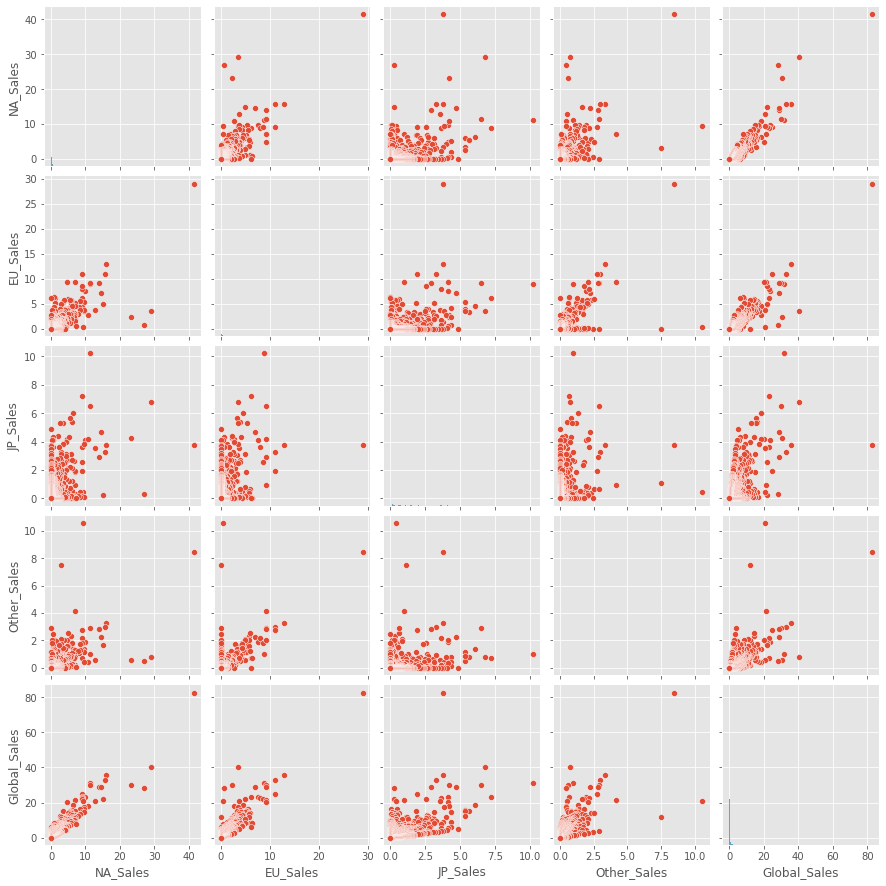

In [46]:
# Corellating among all Continents/Countries using Seaborn to perform pairplot and to plot the graph with matplotlib:

sns.pairplot(df.loc[0:,['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']])
plt.show()

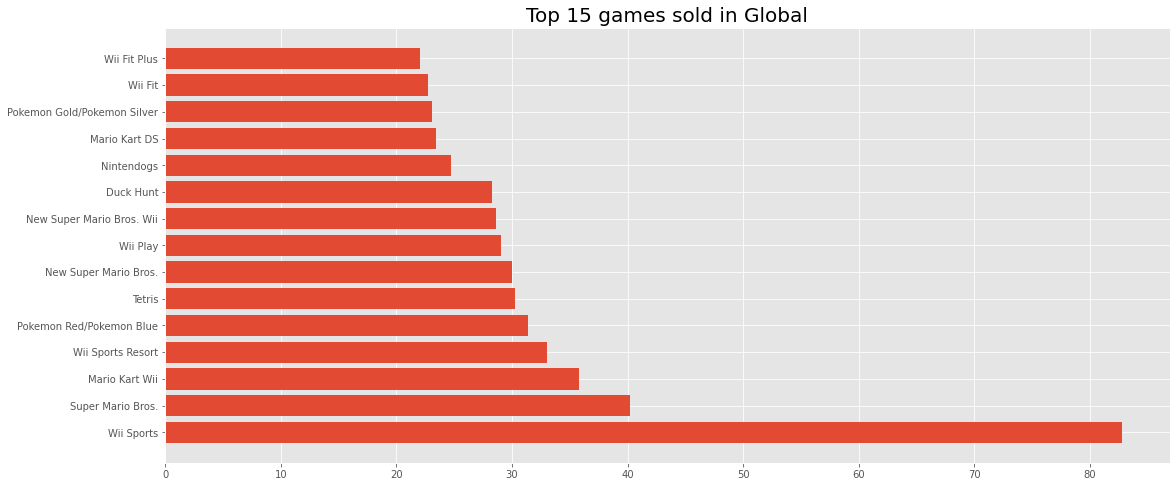

In [54]:
top15 = df[0:15]
plt.figure(figsize = (18,8))
plt.barh(top15["Name"],top15["Global_Sales"], label = 'Top Games')
plt.title("Top 15 games sold in Global",fontdict = {"fontsize":20})
plt.show()

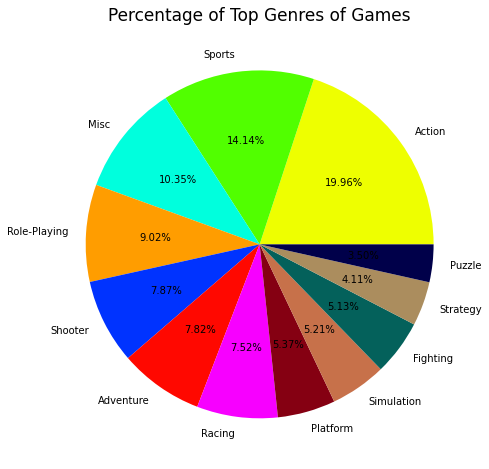

In [55]:
Genre = df.Genre
Genre = Genre.value_counts()
plt.figure(figsize = (8,8))
labels = Genre.index
colors = ["#eeff00","#51ff00","#00ffdd","#ff9d00","#0033ff","#ff0800","#f700ff","#850012","#c7714a","#04615b","#ab8d5e","#00004a"]
plt.pie(Genre,labels = labels,colors = colors,autopct = "%.2f%%") 
plt.title("Percentage of Top Genres of Games",fontdict = {"fontsize":17})
plt.savefig("Top Genres Chart",dpi = 200)
plt.show()

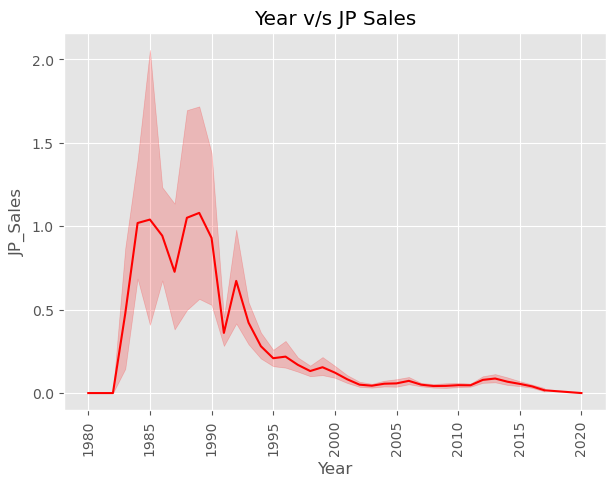

In [56]:
# let's define a function to plot the graphs
def Year_plots(title, sales, color):
  plt.figure(figsize = (7,5), dpi= 100)
  plt.title(title)
  plt.xticks(rotation = 90)
  sns.lineplot(x = 'Year', 
              y = sales,
              color = color, 
              data = df)
Year_plots('Year v/s JP Sales', 'JP_Sales', 'red')

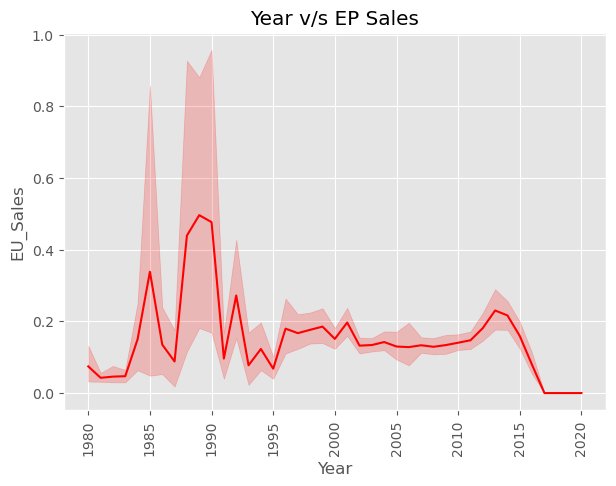

In [58]:
Year_plots('Year v/s EP Sales', 'EU_Sales', 'red')

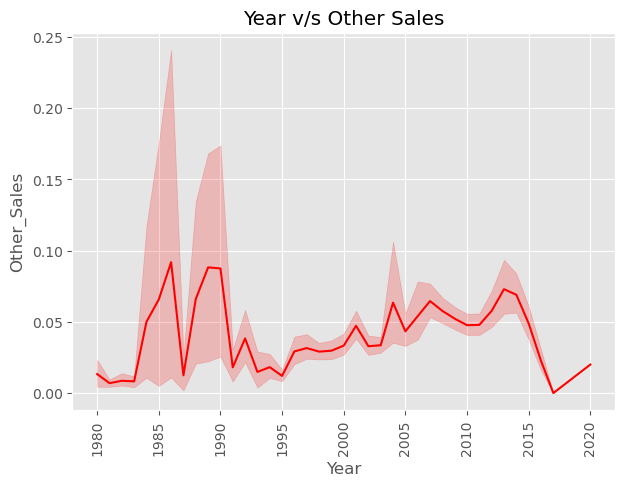

In [66]:
Year_plots('Year v/s Other Sales', 'Other_Sales', 'red')

In [67]:
publishers = list(df['Publisher'].value_counts()[:10].to_dict().keys())
total_sales = []
average_sales = []
for publisher in publishers:
  total_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].sum())
  average_sales.append(df[df['Publisher'] == publisher]['Global_Sales'].mean())
my_dict = {
    'publishers': publishers,
    'total_sales': total_sales,
    'average_sales': average_sales
}

publisher_df = pd.DataFrame(my_dict)
publisher_df

,publishers,total_sales,average_sales
0,Electronic Arts,1093.39,0.816572
1,Activision,721.41,0.746801
2,Namco Bandai Games,253.65,0.273330
3,Ubisoft,473.54,0.515839
4,Konami Digital Entertainment,278.56,0.338469
5,THQ,340.44,0.478146
6,Nintendo,1784.43,2.563836
7,Sony Computer Entertainment,607.28,0.890440
8,Sega,270.70,0.428323
9,Take-Two Interactive,399.30,0.969175


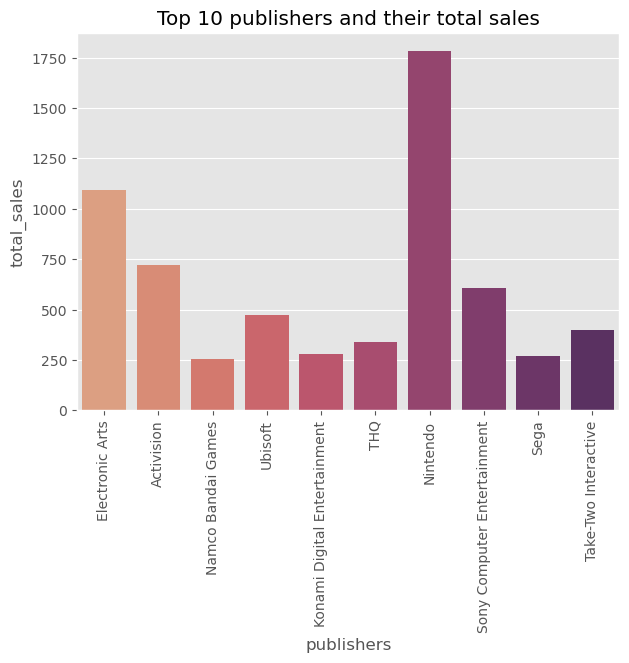

In [71]:
plt.figure(figsize= (7,5), dpi = 100)

plt.title('Top 10 publishers and their total sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'total_sales', 
            data = publisher_df,
            palette = 'flare');

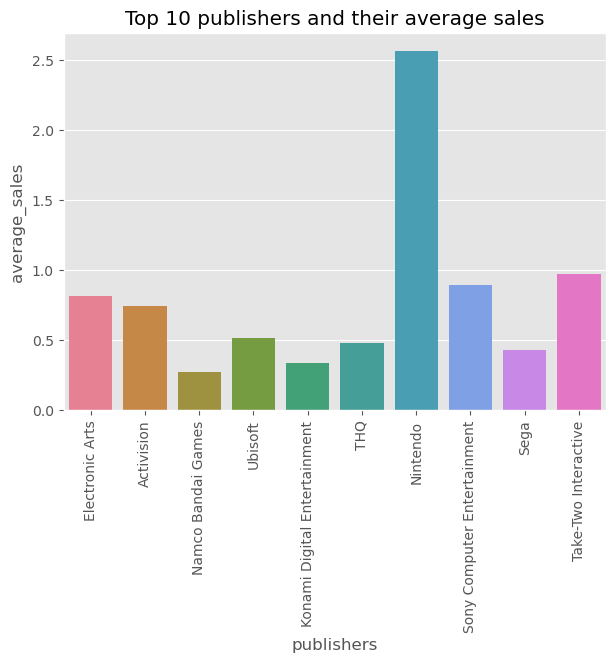

In [73]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Top 10 publishers and their average sales')
plt.xticks(rotation = 90)
sns.barplot(x = 'publishers',
            y = 'average_sales', 
            data = publisher_df,
            palette = 'husl');

<AxesSubplot:xlabel='Genre', ylabel='count'>

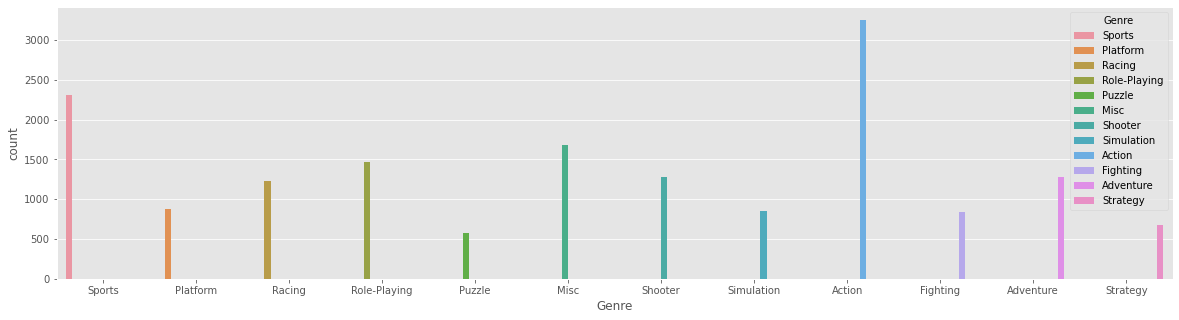

In [80]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.figure(figsize = (20,5))
sns.countplot('Genre', hue = 'Genre', data = df)


In [81]:
year_2009_df = df[df['Year'] == 2009] 
year_2009_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
36,37,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.51
45,46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
...,...,...,...,...,...,...,...,...,...,...,...
16540,16543,15 Days,PC,2009.0,Adventure,DTP Entertainment,0.00,0.01,0.00,0.00,0.01
16551,16554,Sweet Honey Coming,PS2,2009.0,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01


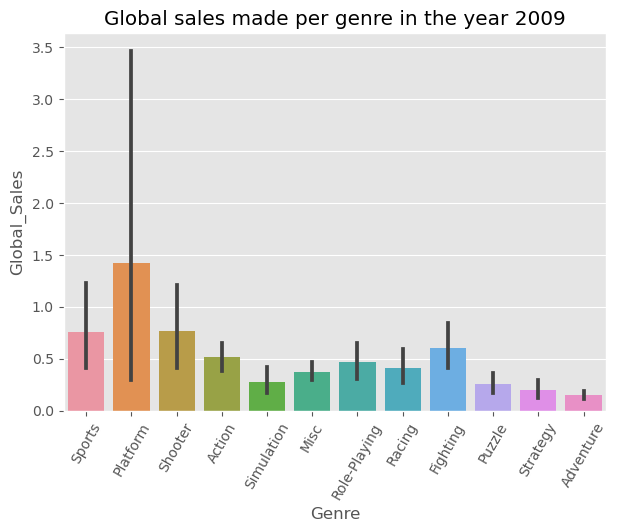

In [82]:
plt.figure(figsize= (7,5), dpi = 100)
plt.title('Global sales made per genre in the year 2009')
plt.xticks(rotation = 60)
sns.barplot(x = 'Genre', 
            y = 'Global_Sales', 
            data = year_2009_df);

In [83]:
df['Publisher'].value_counts()[:10]

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [84]:
ea_df = df[df['Publisher'] == 'Electronic Arts']
ea_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [93]:
genre_table = pd.pivot_table(df, 
                             index = 'Platform', 
                             columns = ['Genre'],
                             values= ['NA_Sales','JP_Sales', 'EU_Sales',
                                      'Other_Sales', 'Global_Sales'], 
                             aggfunc= np.sum)
genre_table.dropna(inplace = True)
# print(list(genre_table.index))
genre_table

EU_Sales                                                   \
Genre      Action Adventure Fighting   Misc Platform Puzzle Racing   
Platform                                                             
3DS         12.33      0.80     2.20   2.13    10.35   2.11   4.58   
DS          26.70     10.45     0.32  35.65    18.96  26.21  10.06   
GBA         14.36      3.29     1.07   7.18    18.79   2.49   5.04   
GC           7.65      1.26     2.91   2.56     5.95   0.89   4.82   
N64          6.32      0.05     3.70   1.44     7.59   0.57   8.29   
PC          17.34      7.65     0.12   2.47     0.33   0.68   2.85   
PS          44.63      7.66    20.88  13.52    21.64   2.37  34.97   
PS2         71.34      5.09    22.41  29.34    23.21   1.93  46.61   
PS3        109.26      8.13    14.69  16.47    10.90   0.05  33.36   
PS4         38.19      2.19     2.73   3.03     3.32   0.02   7.12   
PSP         16.95      0.92     4.52   1.42     5.36   1.26  11.77   
PSV          5.68      0.65     0.70   1.28     1.42   0.05   1.32   
SAT          0.00      0.00     0.38   0.00     0.00   0.00   0.16   
SNES         1.33      0.00     2.90   0.54    10.74   0.00   1.75   
Wii         30.58      4.59     5.11  65.00    24.08   3.60  19.97   
WiiU         6.59      0.08     1.43   3.49     6.16   0.36   2.46   
X360        75.85      4.86     8.92  20.20     4.19   0.04  25.43   
XB          12.21      0.73     2.59   1.88     2.70   0.08   8.66   

                                          ... Other_Sales                  \
Genre    Role-Playing Shooter Simulation  ...    Fighting   Misc Platform   
Platform                                  ...                               
3DS             13.00    0.33       7.93  ...        0.62   0.40     2.26   
DS              18.30    0.59      36.51  ...        0.21   9.75     6.54   
GBA             12.87    0.87       1.43  ...        0.05   0.43     2.27   
GC               2.44    2.90       1.74  ...        0.54   0.44     0.74   
N64              0.35    4.02       1.57  ...        0.30   0.13     0.97   
PC              25.28   21.27      27.19  ...        0.00   0.33     0.09   
PS              12.42   13.57       4.34  ...        3.87   2.29     3.25   
PS2             18.12   33.59      12.10  ...       12.03  21.90     9.11   
PS3             19.79   75.10       3.78  ...        6.69   6.68     5.03   
PS4             10.55   33.15       0.37  ...        1.21   1.16     1.00   
PSP              3.76    5.39       2.09  ...        3.05   1.15     3.27   
PSV              1.64    1.76       0.00  ...        0.48   0.66     0.61   
SAT              0.00    0.00       0.00  ...        0.05   0.00     0.00   
SNES             0.16    0.89       0.44  ...        0.43   0.07     1.78   
Wii              1.95    5.98       7.83  ...        1.91  19.13     7.13   
WiiU             0.62    1.71       0.04  ...        0.67   0.83     1.48   
X360            18.55   76.29       4.00  ...        3.17   7.34     1.12   
XB               3.04   14.94       1.43  ...        0.40   0.27     0.34   

                                                                        
Genre    Puzzle Racing Role-Playing Shooter Simulation Sports Strategy  
Platform                                                                
3DS        0.35   1.06         2.93    0.08       1.37   0.39     0.11  
DS         6.37   3.13         6.46    0.55      11.33   2.49     0.99  
GBA        0.22   0.54         1.83    0.02       0.16   0.24     0.16  
GC         0.12   0.54         0.34    0.33       0.29   0.54     0.10  
N64        0.07   0.58         0.12    0.26       0.33   0.67     0.32  
PC         0.16   0.54         4.97    4.11       4.50   1.58     3.96  
PS         0.60   5.79         4.30    2.22       1.57   6.65     1.45  
PS2        0.72  27.11         8.17   13.38       4.41  43.18     0.84  
PS3        0.04  12.92         8.92   30.18       1.40  19.05     0.57  
PS4        0.00   1.72         3.74   11.82 

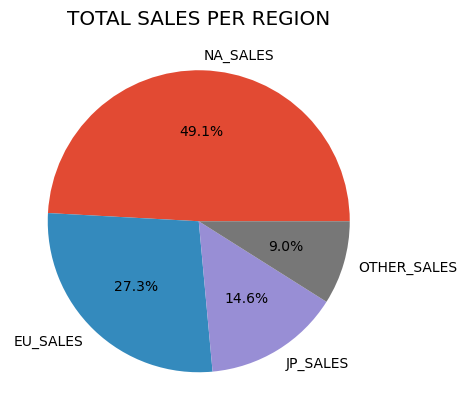

In [103]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
total = []
average = []
for sales_col in sales_cols:
  total.append(df[sales_col].sum())
  average.append(df[sales_col].mean())
    
plt.figure(figsize=(7,5), dpi = 100)
plt.title('Total Sales per region'.upper())
plt.pie(total, labels = [i.upper() for i in sales_cols],  autopct='%1.1f%%');